----
#**Employee Retention Analysis and Logistic Regression**
In-Class Assignment

*This assignment explores employee retention through exploratory data analysis and builds a Logistic Regression model to predict whether employees leave or stay in a company. It delves into the impact of various factors such as satisfaction levels, average monthly hours, promotions, and salaries on employee retention. The analysis also examines the correlation between department and employee retention, providing valuable insights into employee management.*

**Technologies:** *pandas, numpy, matplotlib, seaborn, scikit-learn*

----

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
path = '/content/HR_comma_sep.csv'
df = pd.read_csv(path)

In [29]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [31]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [32]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

----
**1.Exploratory Data Analysis to figure out which variables have direct and clear impact on employee retention**

**(i.e. whether they leave the company or continue to work.)**

----

In [33]:
df_left = df[df['left'] == 1]
df_stay = df[df['left'] == 0]

In [34]:
df.groupby('left').mean()

<ipython-input-34-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


----
**2. Plot Bar charts showing impact of employee salaries on retention**

----

In [35]:
groupedEmpl = df.groupby(['salary', 'left']).size().unstack()
groupedEmpl

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


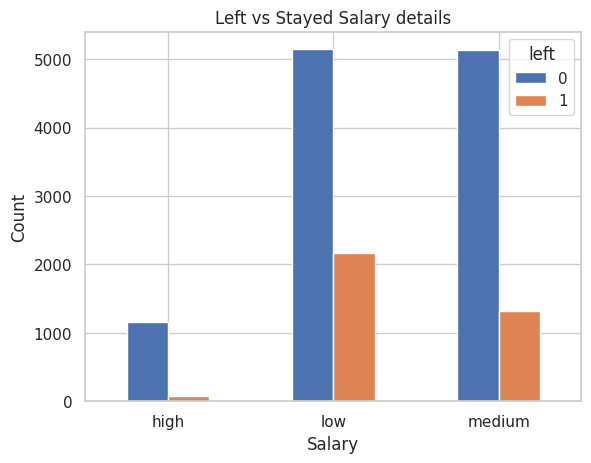

In [36]:
groupedEmpl.plot(kind = 'bar')
plt.title('Left vs Stayed Salary details')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

----
**3. Plot Bar charts showing correlation between department and employee retention**

----

In [37]:
groupedEmpl2 = df.groupby(['Department', 'left']).size().unstack()
groupedEmpl2

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


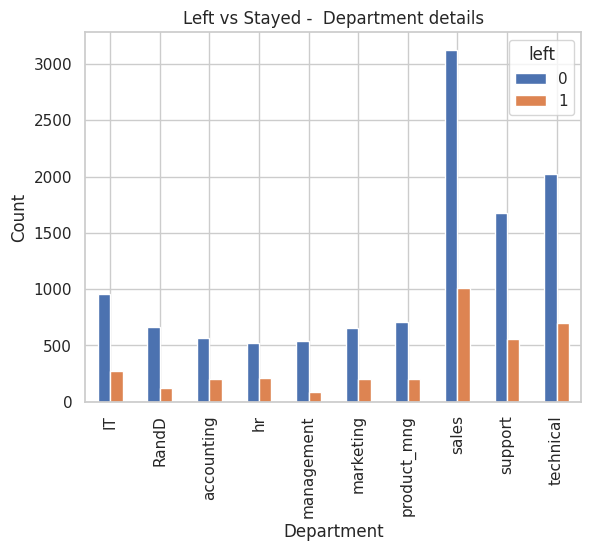

In [38]:
groupedEmpl2.plot(kind = 'bar')
plt.title('Left vs Stayed -  Department details')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

----
**4. Build Logistic Regression model using variables that were narrowed down in Step 1.**

----

In [39]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [40]:
# Features - Satisfaction Levels, Average Monthly Hours, Promotion Last 5 Years, Salary
# Target = left

df_reg = df[['satisfaction_level', 'average_montly_hours','promotion_last_5years','salary']]

In [41]:
df_reg.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Encoding Categorial Values**

In [42]:
X = df_reg.join(pd.get_dummies(df_reg['salary'])).drop(['salary'], axis = 1)

In [43]:
y = df['left']

In [44]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

**Splitting the data into training and testing set**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 5)

**Implementing the Logistic Regression Model**

In [46]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

In [47]:
logistic_reg.fit(X_train, y_train)

LogisticRegression()

**Logistic Regression Model Prediction**

In [48]:
predicted_values = logistic_reg.predict(X_test)

In [49]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})

In [50]:
df_comparison.head(5)

,Actual,Predicted
184,1,0
1126,1,0
942,1,1
11865,0,0
5265,0,0


----
**Measure the accuracy of the model.**

----

In [51]:
logistic_reg.score(X_test, y_test)

0.7662222222222222

----
**Data Visualization**

----

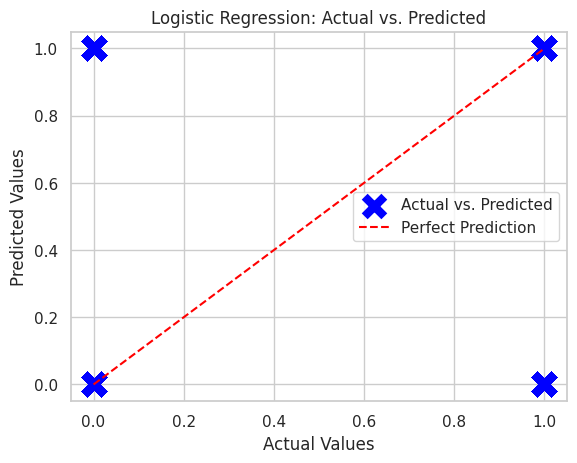

In [52]:
import seaborn as sns
sns.set(style="whitegrid")

sns.scatterplot(x='Actual', y='Predicted', data=df_comparison, color='blue', marker='x', label='Actual vs. Predicted',s = 200, linewidth = 6)
plt.plot([min(df_comparison['Actual']), max(df_comparison['Actual'])], [min(df_comparison['Actual']), max(df_comparison['Actual'])], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Logistic Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.legend()

plt.show()

*By employing Logistic Regression, this assignment effectively predicts employee retention based on the identified variables, offering a data-driven approach to understanding and managing workforce dynamics. The accuracy of the model is assessed, and data visualization illustrates the relationship between actual and predicted employee retention, facilitating informed decision-making in human resources.*